**Pramesh Baral (110013536)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, log_loss

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn


Here we are importing the Fertility dataset using UC Irvine Machine Learnin Repository API.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
fertility = fetch_ucirepo(id=244)
# data (as pandas dataframes)
X_df = fertility.data.features
y_df = fertility.data.targets
# metadata
print(fertility.metadata)
# variable information
print(fertility.variables)

{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girela, Joaquin De Juan, M. Jose G

In [ ]:
X_df.head()


,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [ ]:
y_df.head()

,diagnosis
0,N
1,O
2,N
3,N
4,O


In [ ]:
X = X_df.to_numpy()
y = y_df.diagnosis.replace({'N': 0, 'O': 1}).to_numpy()

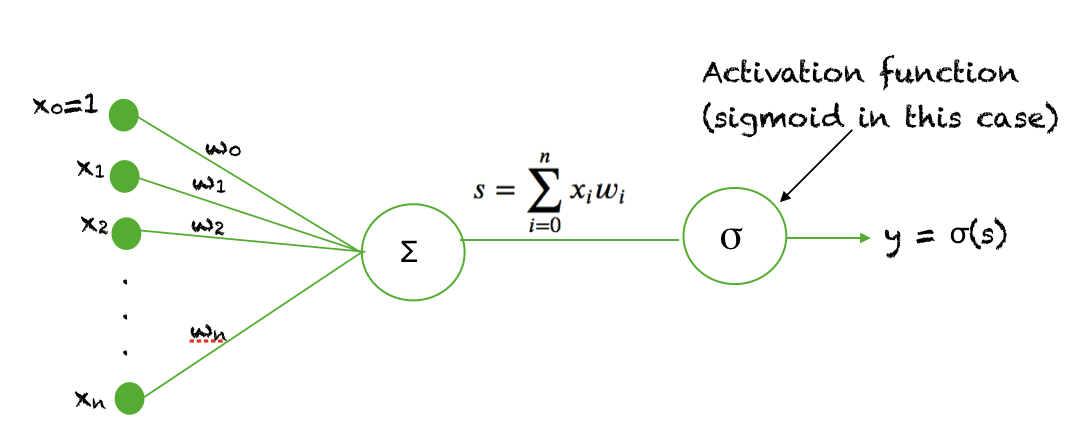

In [ ]:
def sigmoid(z):
 return 1 / (1 + np.exp(-z))

In [ ]:
def hx(w, X):
 ones = np.ones((X.shape[0], 1))
 X_with_bias = np.hstack([ones, X])
 z = np.dot(X_with_bias, w)
 return sigmoid(z)

**Cost Function - Binary Cross Entropy**

In [ ]:
def cost(w, X, Y):
 y_pred = hx(w, X)
 return -np.mean(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))

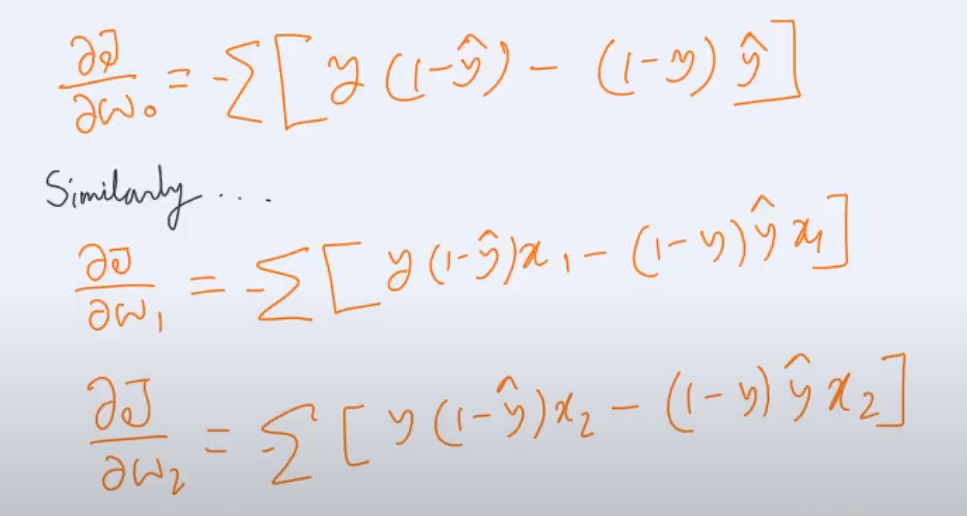

In [ ]:
def grad(w, X, Y):
 y_pred = hx(w, X)
 errors = y_pred - Y
 ones = np.ones((X.shape[0], 1))
 X_with_bias = np.hstack([ones, X])
 gradients = np.dot(X_with_bias.T, errors) / Y.size
 return gradients

In [ ]:
def descent(w_init, lr, X, Y, max_iter=1000, tolerance=1e-6):
    w = w_init
    for j in range(max_iter):
        gradients = grad(w, X, Y)
        w_new = w - lr * gradients
        if np.linalg.norm(w_new - w, 2) < tolerance:
            print(f"Converged after {j+1} iterations.")
            return w_new
        w = w_new
        if (j + 1) % 100 == 0:
            print(f"Iteration {j+1}: Cost {cost(w, X, Y)}")
            print(f"weights: {w}")
    print("Max iterations reached without convergence.")
    return w

**Visualizing the RESULTS**

In [ ]:
def generate_results(y_test, y_pred, y_proba=None):
    # Print classification metrics
    print("Classification Metrics:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"  Precision: {precision_score(y_test, y_pred)}")
    print(f"  Recall: {recall_score(y_test, y_pred)}")
    print(f"  F1 Score: {f1_score(y_test, y_pred)}")

    # Compute and print AUC and Log Loss
    auc = roc_auc_score(y_test, y_pred)
    print(f"\nAUC: {auc}")
    print(f"Log Loss: {log_loss(y_test, y_pred)}")

    # Compute and plot Confusion Matrix and ROC Curve
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba if y_proba is not None else y_pred)

    # Plot Confusion Matrix and ROC Curve
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Confusion Matrix
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    # Plot ROC Curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    roc_display.plot(ax=ax[1])
    ax[1].plot([0, 1], [0, 1], color='green', linestyle='--')
    ax[1].set_title('ROC Curve')

    # Show plots
    plt.tight_layout()
    plt.show()

In [ ]:
w_init = np.zeros(X.shape[1] + 1)
lr = 0.01


In [ ]:
w_optimal = descent(w_init, lr, X, y, 1000, 1e-6)
print(f'\nOptimal weights after training Logistic Regression model:')
print(w_optimal)

Iteration 100: Cost 0.4354144569747552
weights: [-0.25213367  0.06214325 -0.16364031 -0.22027804 -0.12934375 -0.11664533
 -0.06819453 -0.21693991  0.09301912 -0.10129138]
Iteration 200: Cost 0.3798059970753205
weights: [-0.36956183  0.10632317 -0.23679483 -0.32026913 -0.19576786 -0.16247225
 -0.10838357 -0.32125459  0.13358173 -0.147873  ]
Iteration 300: Cost 0.36189020717787557
weights: [-0.4342601   0.14340965 -0.27464901 -0.37354977 -0.23816295 -0.18143329
 -0.13765424 -0.38159125  0.15516677 -0.17301437]
Iteration 400: Cost 0.35432965341921785
weights: [-0.47340047  0.17654133 -0.29543329 -0.40425669 -0.2690011  -0.18772299
 -0.16146321 -0.42064174  0.16806627 -0.18774766]
Iteration 500: Cost 0.3503795840111965
weights: [-0.4984162   0.20688017 -0.30680088 -0.42246229 -0.29340023 -0.1872079
 -0.18203867 -0.44793453  0.1763724  -0.19671612]
Iteration 600: Cost 0.3479050028352468
weights: [-0.51500724  0.23495813 -0.31256145 -0.43316069 -0.31386821 -0.18277927
 -0.20047005 -0.4682131

In [ ]:
y_prob = hx(w_optimal, X)
y_pred = np.array([1 if prob > 0.5 else 0 for prob in y_prob])


Classification Metrics:
  Accuracy: 0.88
  Precision: 0.0
  Recall: 0.0
  F1 Score: 0.0

AUC: 0.5
Log Loss: 4.325238406694059


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


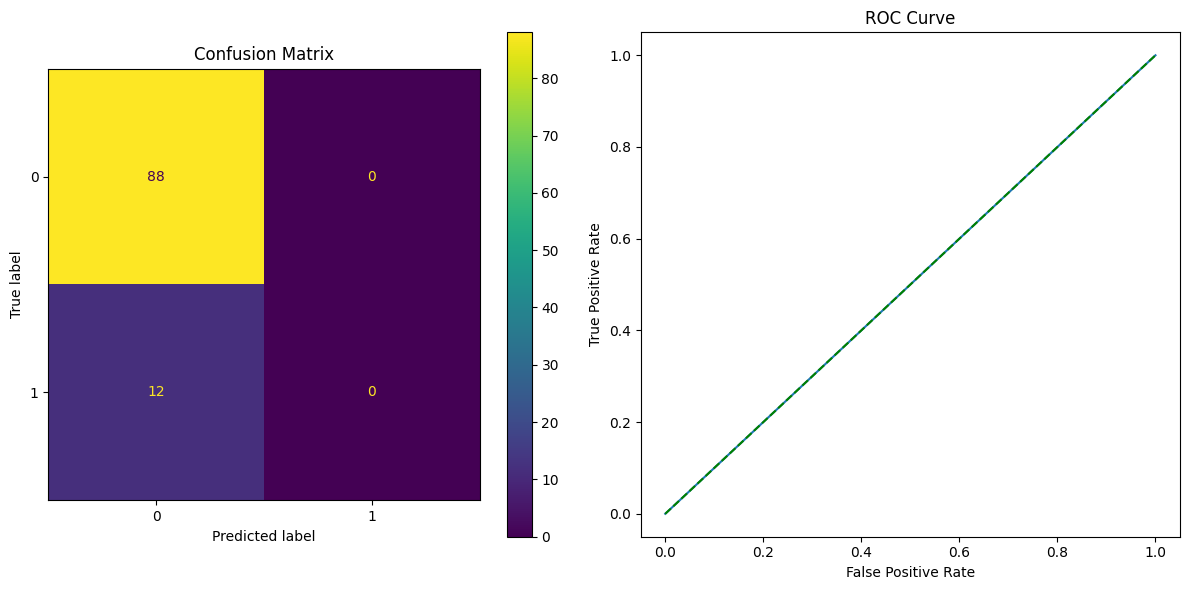

In [ ]:
#generate_results(y, y_pred, y_prob)
generate_results(y, y_pred)

Logistic Regression implementation with Scikit learn library.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
clf.score(X, y)

0.88

In [ ]:
y_prob_clf = clf.predict_proba(X)
y_pred_clf = clf.predict(X)

Classification Metrics:
  Accuracy: 0.88
  Precision: 0.0
  Recall: 0.0
  F1 Score: 0.0

AUC: 0.5
Log Loss: 4.325238406694059


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


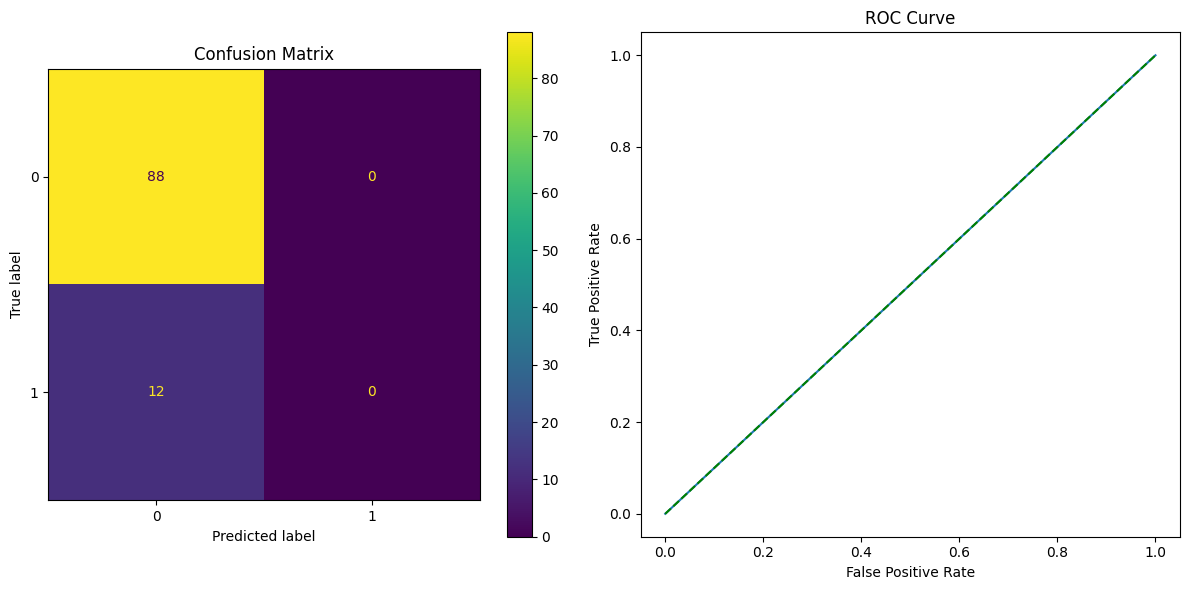

In [ ]:
# generate_results(y, y_pred_clf, y_prob_clf[:,1])
generate_results(y, y_pred_clf)


**Conclusion:** The conclusions drawn from both the Logistic Regression Scratch and Logistic Regression Scikit-Learn implementations highlight their identical results and consistent performance.

This consistency indicates that the scratch implementation faithfully replicates the behavior of the scikit-learn library methods.

The occurrence of the UndefinedMetricWarning suggests that the model made no positive predictions, leading to an undefined precision metric.

However, both implementations struggled to accurately predict the 'O' or 1 class among the 'N' and 'O' classes due to the dataset's highly imbalanced nature, with limited data points for the 'O' target class, which hindered the models' ability to learn their patterns effectively.